In [9]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [10]:
word_index = imdb.get_word_index()

In [11]:
reversed_word_index = {v: k for k, v in word_index.items()}

' '.join([reversed_word_index.get(i - 3, "({})".format(i)) for i in train_data[0]])

"(1) this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert (2) is an amazing actor and now the same being director (2) father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for (2) and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also (2) to the two little boy's that played the (2) of norman and paul they were just brilliant children are often left out of the (2) list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

In [12]:
print(train_labels[0])

1


# Parte 1, con frecuencia de las palabras

In [13]:
import numpy as np

# Vectorizamos las reseñas convirtiendolas en vectores de 10.000 valores 1s y 0s
def vectorize(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1.

  return results


# Para que lo anterior funcione se basa en la siguiente propiedad
a = np.zeros(15)
print("Array original:\t\t", a)
a[[0, 3, 5, 7, 9]] = 1.
print("Array modificado:\t", a)

dim = 10000

# Vectorizamos tanto el conjunto de datos de entrenamiento, como el conjunto de datos de pruebas.
X_train = vectorize(train_data, dim)
X_test = vectorize(test_data, dim)

Array original:		 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Array modificado:	 [1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]


## Construcción del modelo:

In [14]:
num_validation_samples = 3000

X_val = X_test[:num_validation_samples]
y_val = test_labels[:num_validation_samples]

X_test = X_test[num_validation_samples:]
y_test = test_labels[num_validation_samples:]

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(dim,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.SGD(learning_rate=0.0006),
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision'])


c:\Users\soyun\anaconda3\envs\aprendizaje\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# X_val = X_train[:3000]
# partial_X_train = X_train[3000:]
# y_val = train_labels[:3000]
# partial_y_train = train_labels[3000:]

history = model.fit(X_train, train_labels,
                    epochs=600,
                    batch_size=512,
                    validation_data=(X_val, y_val))


Epoch 1/600
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Precision: 0.4930 - accuracy: 0.4897 - loss: 0.7044 - val_Precision: 0.4763 - val_accuracy: 0.4770 - val_loss: 0.7049
Epoch 2/600
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.4949 - accuracy: 0.4915 - loss: 0.7012 - val_Precision: 0.4777 - val_accuracy: 0.4810 - val_loss: 0.7019
Epoch 3/600
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.4989 - accuracy: 0.4965 - loss: 0.6989 - val_Precision: 0.4789 - val_accuracy: 0.4847 - val_loss: 0.6997
Epoch 4/600
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.4945 - accuracy: 0.4958 - loss: 0.6978 - val_Precision: 0.4769 - val_accuracy: 0.4827 - val_loss: 0.6979
Epoch 5/600
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.5024 - accuracy: 0.5046 - loss: 0.6952 - val_Precision: 0.4769 - val_accuracy: 0.4847 - val_loss: 0.6965
Epoch 6/600
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.5015 - accuracy: 0.5057 - loss: 0.6948 - val_Precision: 0.4812 - val_accuracy: 

In [40]:
results = model.evaluate(X_test, y_test)
print(results)


688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - Precision: 0.8785 - accuracy: 0.8781 - loss: 0.2990
[0.2917636036872864, 0.880863606929779, 0.8820921182632446]


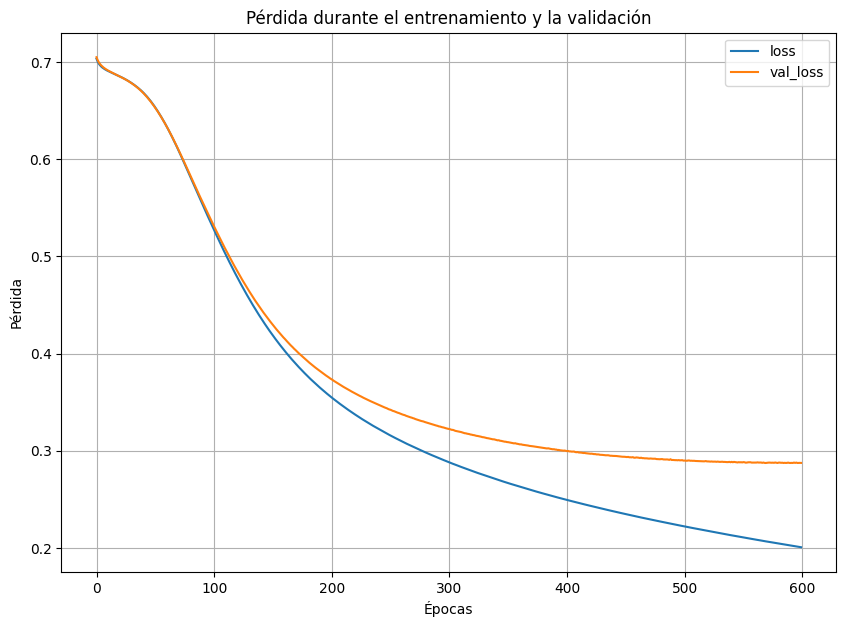

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame y graficar la pérdida
pd.DataFrame({
    'loss': history.history['loss'], 
    'val_loss': history.history['val_loss']
}).plot(figsize=(10, 7))
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()


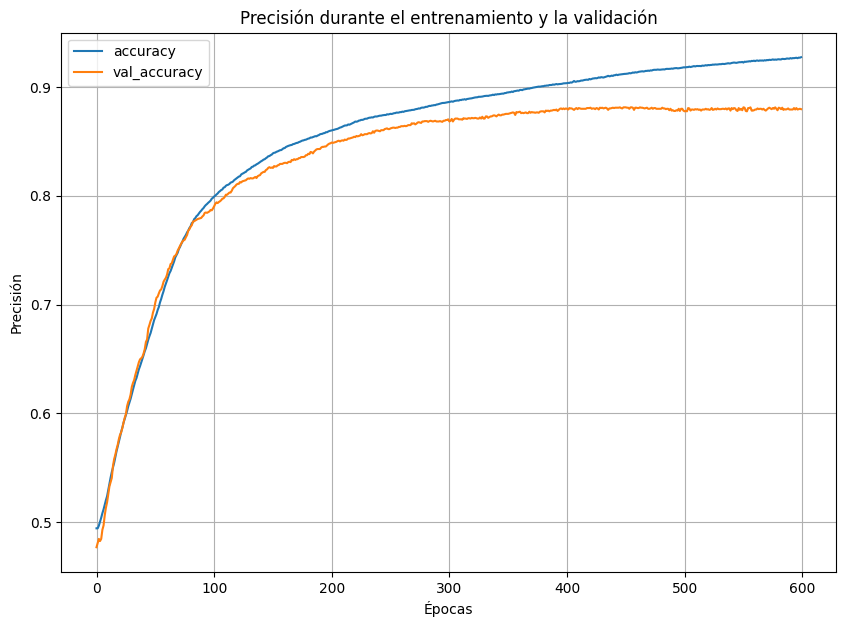

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame y graficar la precisión
pd.DataFrame({
    'accuracy': history.history['accuracy'], 
    'val_accuracy': history.history['val_accuracy']
}).plot(figsize=(10, 7))
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()


# Parte 2, vector en crudo

In [12]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()

reversed_word_index = {v: k for k, v in word_index.items()}

" ".join([reversed_word_index.get(i - 3, "({})".format(i)) for i in train_data[0]])

"(1) this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert (2) is an amazing actor and now the same being director (2) father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for (2) and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also (2) to the two little boy's that played the (2) of norman and paul they were just brilliant children are often left out of the (2) list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

## Division del conjunto de datos y vectorización

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Cargar datos
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Obtener índice de palabras
word_index = imdb.get_word_index()

# Crear un índice de palabras invertido
reversed_word_index = {value: key for key, value in word_index.items()}

# Decodificar las reseñas al texto
def decode_review(data):
    return [" ".join([reversed_word_index.get(i - 3, '?') for i in review]) for review in data]

X_train_prep = decode_review(train_data)
X_test_prep = decode_review(test_data)


In [2]:
# Vectorizar los textos
vectorizer = CountVectorizer(binary=True)  # Usamos la representación binaria
X_train = vectorizer.fit_transform(X_train_prep)
X_test = vectorizer.transform(X_test_prep)

# Convertir a numpy arrays para trabajar con Keras
X_train = X_train.toarray()
X_test = X_test.toarray()


In [3]:
num_validation_samples = 3000

X_val = X_test[:num_validation_samples]
y_val = test_labels[:num_validation_samples]

X_test = X_test[num_validation_samples:]
y_test = test_labels[num_validation_samples:]


In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


# Modelo
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.SGD(learning_rate=0.0008),
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision'])



c:\Users\soyun\anaconda3\envs\aprendizaje\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:


history = model.fit(X_train, train_labels,
                    epochs=80,
                    batch_size=128,
                    validation_data=(X_val, y_val))


Epoch 1/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.5056 - accuracy: 0.5029 - loss: 0.6945 - val_Precision: 0.5311 - val_accuracy: 0.5500 - val_loss: 0.6856
Epoch 2/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.5499 - accuracy: 0.5396 - loss: 0.6881 - val_Precision: 0.5867 - val_accuracy: 0.5897 - val_loss: 0.6792
Epoch 3/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.5930 - accuracy: 0.5719 - loss: 0.6822 - val_Precision: 0.6284 - val_accuracy: 0.6173 - val_loss: 0.6726
Epoch 4/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.6392 - accuracy: 0.6046 - loss: 0.6755 - val_Precision: 0.6611 - val_accuracy: 0.6503 - val_loss: 0.6657
Epoch 5/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.6629 - accuracy: 0.6334 - loss: 0.6685 - val_Precision: 0.6793 - val_accuracy: 0.6770 - val_loss: 0.6576
Epoch 6/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.6852 - accuracy: 0.6623 - loss: 0.6597 - val_Precision: 0.6977 - val_accu

In [6]:
results = model.evaluate(X_test, y_test)
print(results)

688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - Precision: 0.8713 - accuracy: 0.8732 - loss: 0.3079
[0.30075109004974365, 0.8760908842086792, 0.8762858510017395]


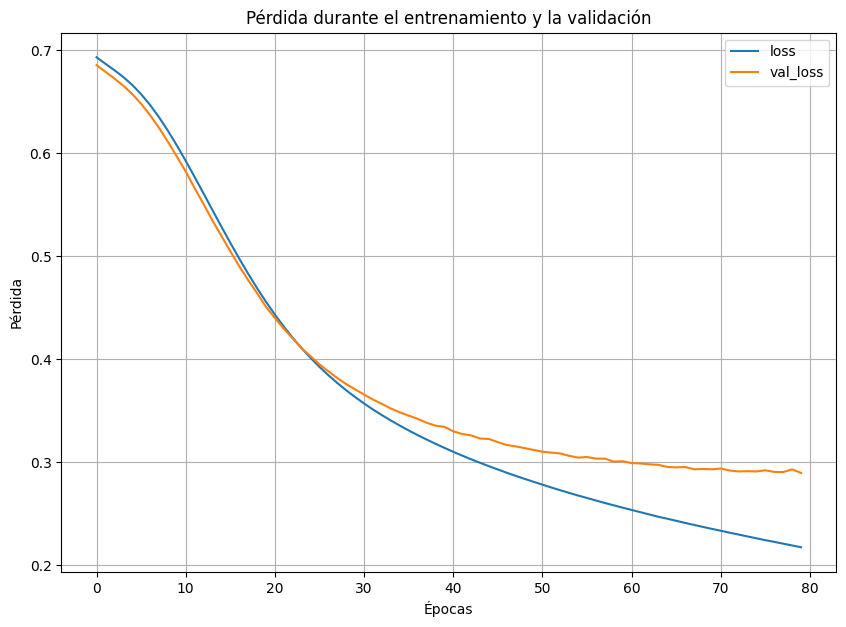

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame y graficar la pérdida
pd.DataFrame({
    'loss': history.history['loss'], 
    'val_loss': history.history['val_loss']
}).plot(figsize=(10, 7))
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()


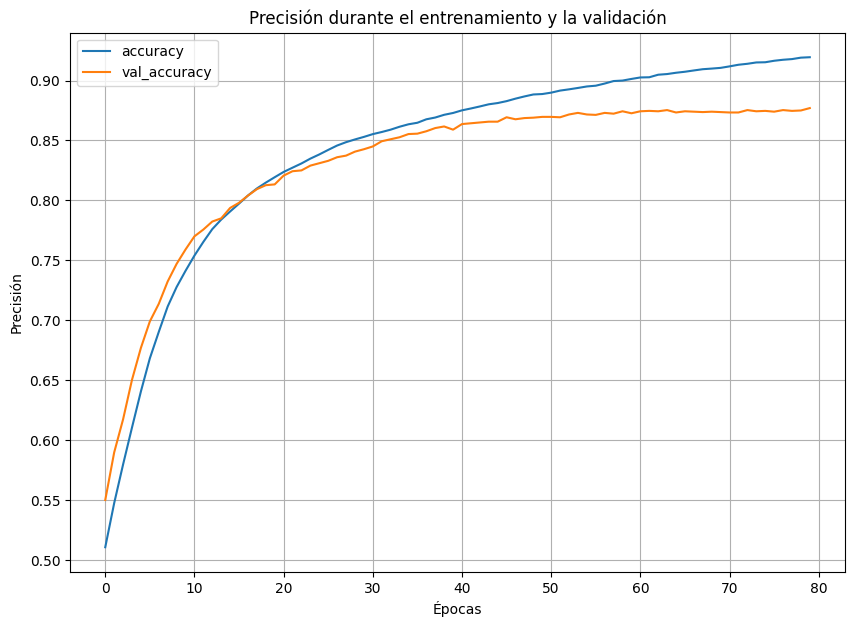

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame y graficar la precisión
pd.DataFrame({
    'accuracy': history.history['accuracy'], 
    'val_accuracy': history.history['val_accuracy']
}).plot(figsize=(10, 7))
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()